In [4]:
library(data.table)
library(ggplot2)
library(dplyr)
library(viridis)
library(stringr)
library(scales)
theme_set(theme_bw())
source("setup.R")

In [28]:
zymo_stats <- concatenate_all_results()
cami_air_stats <- concatenate_all_results('/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Airways/binning/stats/')

Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_aviary.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_metaspades_scaffolds.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_operams.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_aviary.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_metaspades_scaffolds.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs i

In [128]:
zymo_stats[, unique(max_scaffold_size), by=c("sample_name", "assembler")]
zymo_stats[sample_name %in% c("SRR10084340", "SRR10084341", "SRR10084344", "SRR10084345"), unique(assembly_size), by=c("sample_name", "assembler")]
zymo_stats[sample_name %in% c("SRR10084338", "SRR10084339", "SRR10084342", "SRR10084343"), unique(assembly_size), by=c("sample_name", "assembler")]

sample_name,assembler,V1
<chr>,<chr>,<int>
SRR10084338,OPERA-MS,2941000
SRR10084338,metaSPAdes,6602000
SRR10084338,metaFlye,6782000
SRR10084338,Aviary,6792000
SRR10084339,OPERA-MS,2973000
SRR10084339,metaSPAdes,6602000
SRR10084339,metaFlye,6782000
SRR10084339,Aviary,6792000
SRR10084340,OPERA-MS,1438000


sample_name,assembler,V1
<chr>,<chr>,<dbl>
SRR10084340,OPERA-MS,42443333
SRR10084340,metaSPAdes,34445888
SRR10084340,metaFlye,60625189
SRR10084340,Aviary,50298649
SRR10084341,OPERA-MS,23818280
SRR10084341,metaSPAdes,33664334
SRR10084341,metaFlye,49250328
SRR10084341,Aviary,38653258
SRR10084344,OPERA-MS,39245272


sample_name,assembler,V1
<chr>,<chr>,<dbl>
SRR10084338,OPERA-MS,23905892
SRR10084338,metaSPAdes,27009204
SRR10084338,metaFlye,21409642
SRR10084338,Aviary,28568514
SRR10084339,OPERA-MS,23267299
SRR10084339,metaSPAdes,25937433
SRR10084339,metaFlye,15771138
SRR10084339,Aviary,26085874
SRR10084342,OPERA-MS,31463029


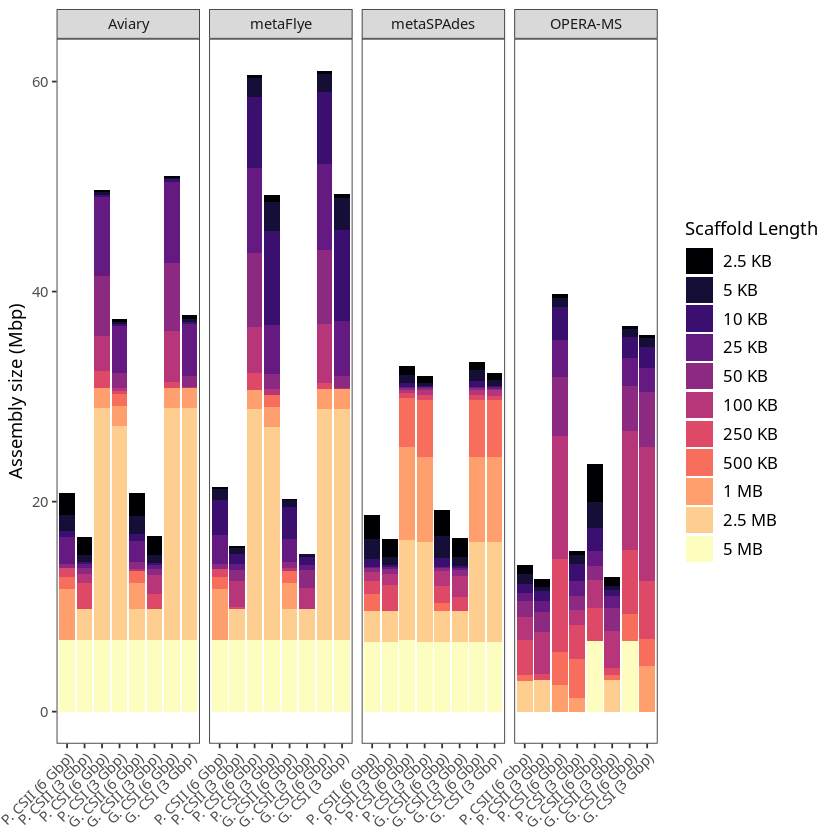

In [93]:
sample_types <- c("P. CSII (6 Gbp)", "P. CSII (3 Gbp)", "P. CSI (6 Gbp)", "P. CSI (3 Gbp)", "G. CSII (6 Gbp)", "G. CSII (3 Gbp)", "G. CSI (6 Gbp)", "G. CSI (3 Gbp)")
names(sample_types) <- c("SRR10084338", "SRR10084339", "SRR10084340", "SRR10084341", "SRR10084342", "SRR10084343", "SRR10084344", "SRR10084345")

assembly_sizes <- ggplot(zymo_stats[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size / 1e6, x=sample_name)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    scale_x_discrete(labels=sample_types) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1)
        ) +
    facet_wrap(~assembler, nrow=1, ncol=4, labeller=labeller(sample_name=sample_types))
assembly_sizes
# ggsave("zymo_assembly_sizes.png", width=8, height=8, dpi=600)

P. CSII (6 Gbp) P. CSII (3 Gbp)  P. CSI (6 Gbp)  P. CSI (3 Gbp) G. CSII (6 Gbp) 
      "#F8766D"       "#CD9600"       "#7CAE00"       "#00BE67"       "#00BFC4" 
G. CSII (3 Gbp)  G. CSI (6 Gbp)  G. CSI (3 Gbp) 
      "#00A9FF"       "#C77CFF"       "#FF61CC"

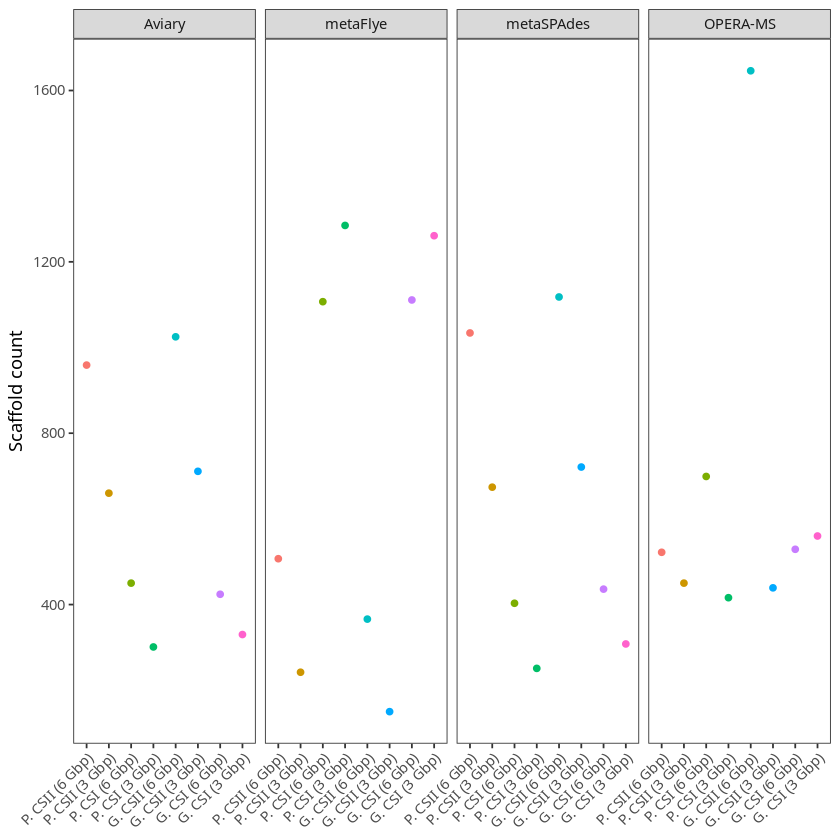

In [92]:
# pltting number of scaffolds in each assembly
sample_types <- c("P. CSII (6 Gbp)", "P. CSII (3 Gbp)", "P. CSI (6 Gbp)", "P. CSI (3 Gbp)", "G. CSII (6 Gbp)", "G. CSII (3 Gbp)", "G. CSI (6 Gbp)", "G. CSI (3 Gbp)")
names(sample_types) <- c("SRR10084338", "SRR10084339", "SRR10084340", "SRR10084341", "SRR10084342", "SRR10084343", "SRR10084344", "SRR10084345")
values = gg_color_hue(length(sample_types))
names(values) = sample_types
values
# ?scale_colour_manual
scaffold_count <- ggplot(zymo_stats[min_scaffold_length=="2.5 KB"], aes(color=sample_name, x=sample_name, y=number_of_scaffolds)) +
    scale_color_hue(labels=sample_types) +
    scale_x_discrete(labels=sample_types) +
    geom_point() +
    labs(y="Scaffold count", x="Assembler") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          legend.position="none",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1)
        ) +
    facet_wrap(~assembler, nrow=1, ncol=4, labeller=labeller(sample_name=sample_types))
scaffold_count

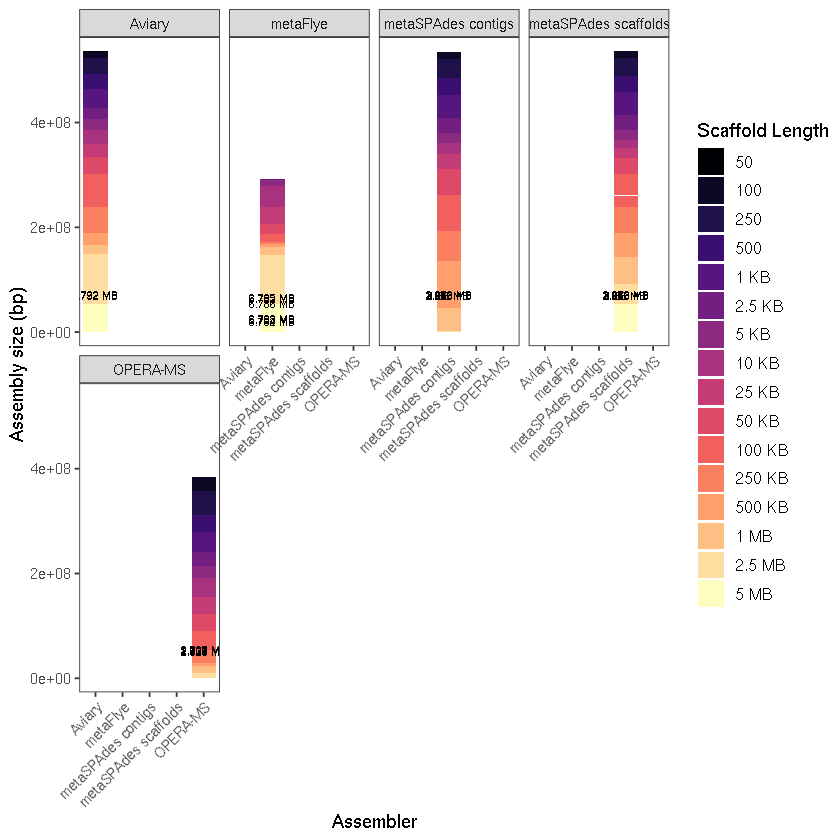

In [538]:
ggplot(test_stats, aes(fill=min_scaffold_length, y=gained_size, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (bp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    geom_text(aes(y=assembly_size + 3500000, x=assembler, label=max_contig_size), size=2) + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1)
        ) +
    facet_wrap(~assembler, nrow=2, ncol=4, labeller=labeller(sample_name=sample_types))

# ggsave("zymo_assembly_sizes_landscape.png", width=12, height=6, dpi=600)

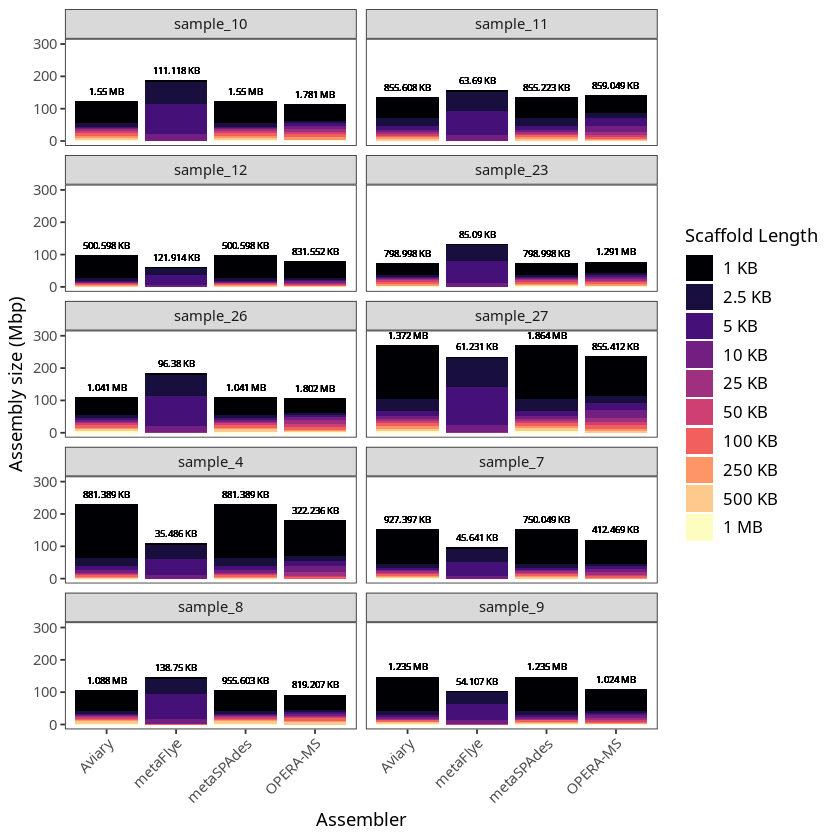

In [37]:
ggplot(cami_air_stats, aes(fill=min_scaffold_length, y=gained_size / 1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    geom_text(aes(y=(assembly_size / 1e6) + 30, x=assembler, label=max_contig_size), size=2) + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1)
        ) +
    facet_wrap(~sample_name, nrow=5, ncol=2)

In [136]:
all_stats$fraction_recovered[, mean:=mean(value), by=c("euk", "variable")]
all_stats$fraction_recovered[, unique(mean), by=c("euk", "variable")]

euk,variable,V1
<lgl>,<fct>,<dbl>
FALSE,Aviary,78.1025781
TRUE,Aviary,25.6804375
FALSE,metaFlye,68.9305937
TRUE,metaFlye,38.9823750
FALSE,metaSPAdes,77.7428750
TRUE,metaSPAdes,9.3764375
FALSE,OPERA_MS,72.9413438
TRUE,OPERA_MS,0.8908125


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


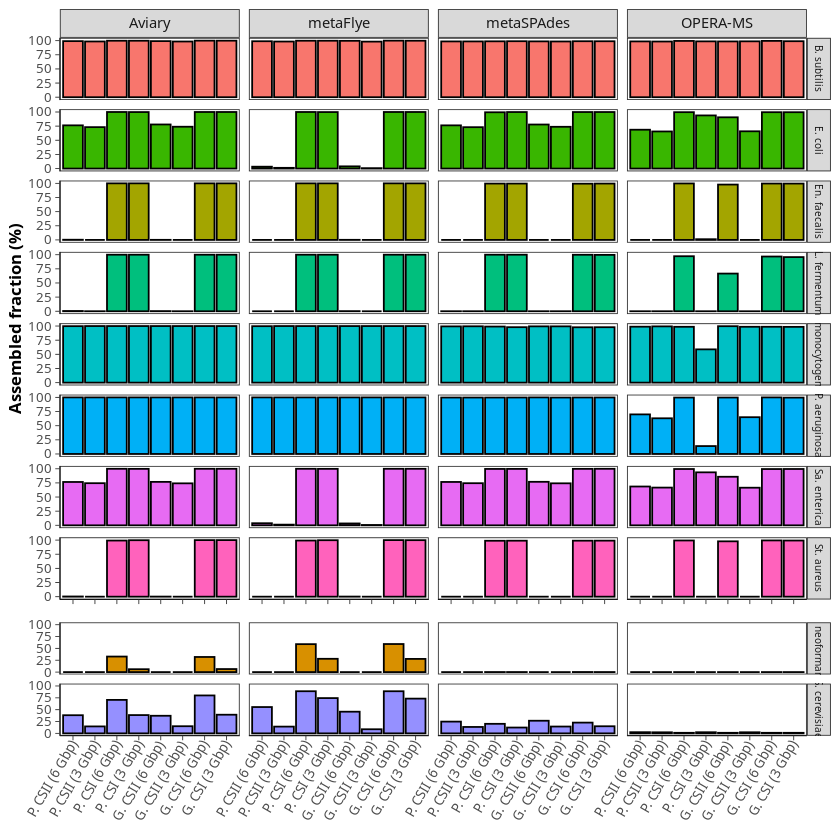

In [39]:

sample_types <- c("P. CSII (6 Gbp)", "P. CSII (3 Gbp)", "P. CSI (6 Gbp)", "P. CSI (3 Gbp)", "G. CSII (6 Gbp)", "G. CSII (3 Gbp)", "G. CSI (6 Gbp)", "G. CSI (3 Gbp)")
names(sample_types) <- c("SRR10084338", "SRR10084339", "SRR10084340", "SRR10084341", "SRR10084342", "SRR10084343", "SRR10084344", "SRR10084345")
assemblers <- c("Aviary", "metaSPAdes", "metaFlye", "OPERA-MS")
names(assemblers) <- c("Aviary", "metaSPAdes", "metaFlye", "OPERA_MS")

all_stats <- get_quast_stats()
genomes <- c("B. subtilis","C. neoformans","En. faecalis","E. coli","L. fermentum","L. monocytogenes","P. aeruginosa","S. cerevisiae","Sa. enterica","St. aureus")
values = gg_color_hue(length(genomes))
names(values) = genomes

bac_theme <- theme(axis.text=element_text(size=8),
          axis.title=element_text(size=10, face="bold"),
          axis.title.x=element_blank(),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          axis.text.x=element_blank(),
          strip.text.y=element_text(size=6),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="none" ,
          legend.direction="horizontal", 
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

euk_theme <- theme(axis.text=element_text(size=8),
          strip.text.x=element_blank(),
          axis.text.x=element_text(angle=60, vjust=1.15, hjust=1.1),
          axis.title=element_text(size=10),
          axis.title.x=element_blank(),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          strip.text.y=element_text(size=6),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="none" ,
          legend.direction="horizontal", 
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

bac <- ggplot(data=all_stats$fraction_recovered[euk == FALSE, ], aes(x=sample, y=value, fill=Assemblies)) +
    scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
    expand_limits(y=c(0, 100)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers)) +
    labs(y="Assembled fraction (%)") +
    scale_x_discrete(labels=sample_types) +
    bac_theme

euk <- ggplot(data=all_stats$fraction_recovered[euk == TRUE, ], aes(x=sample, y=value, fill=Assemblies)) +
    scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
    expand_limits(y=c(0, 100)) + 
    scale_x_discrete(labels=sample_types) +
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers)) +
    labs(y="") +
    euk_theme

assembled_fraction <- ggarrange(bac, euk, nrow=2, ncol=1, heights=c(0.73, 0.27))
assembled_fraction
ggsave("zymo_fraction_recovered.png", dpi=600, width=12, height=6)

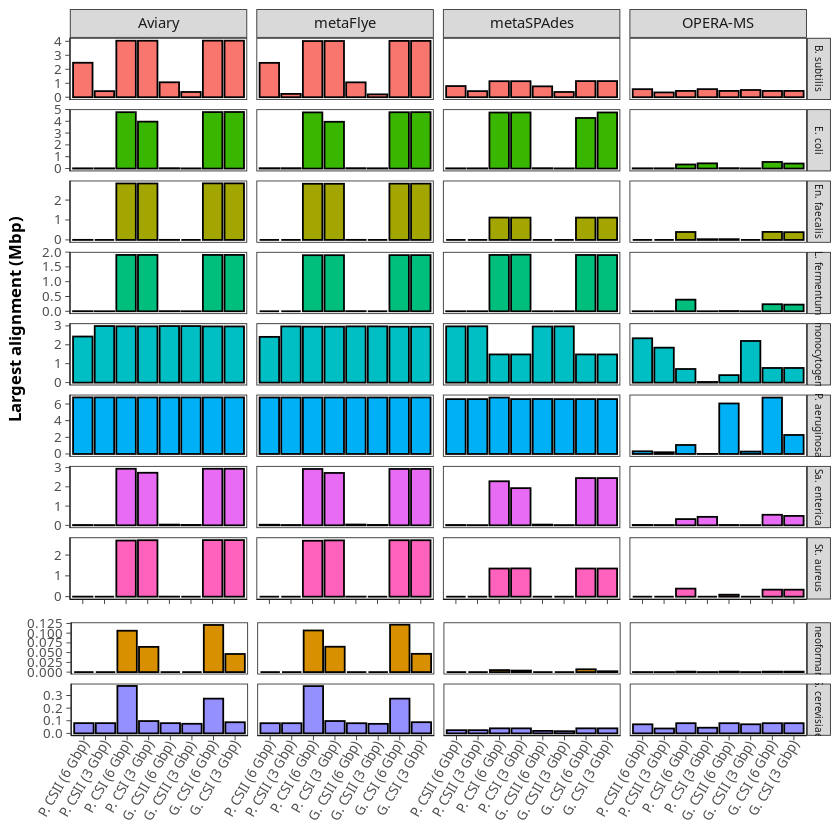

In [89]:
bac <- ggplot(data=all_stats$largest_alignment[euk == FALSE, ], aes(x=sample, y=value / 1e6, fill=Assemblies)) +
    scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 7)) + 
    labs(y="Largest alignment (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    bac_theme +
    theme(
        axis.title.y=element_text(margin = margin(t = 0, r = 11, b = 0, l = 0))
    )

euk <- ggplot(data=all_stats$largest_alignment[euk == TRUE, ], aes(x=sample, y=value / 1e6, fill=Assemblies)) +
    scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 7)) + 
    scale_x_discrete(labels=sample_types) +
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    labs(y="") +
    euk_theme

largest_alignment <- ggarrange(bac, euk, nrow=2, ncol=1, heights=c(0.73, 0.27))
largest_alignment
ggsave("zymo_largest_alignment.png", dpi=600, width=12, height=6)

In [122]:
all_stats$largest_contig[euk == FALSE, ]

Assemblies,sample,euk,variable,value
<chr>,<chr>,<lgl>,<fct>,<dbl>
B. subtilis,SRR10084338,FALSE,Aviary,2465437
En. faecalis,SRR10084338,FALSE,Aviary,2465437
E. coli,SRR10084338,FALSE,Aviary,2465437
L. fermentum,SRR10084338,FALSE,Aviary,2465437
L. monocytogenes,SRR10084338,FALSE,Aviary,2465437
P. aeruginosa,SRR10084338,FALSE,Aviary,6792077
Sa. enterica,SRR10084338,FALSE,Aviary,2465437
St. aureus,SRR10084338,FALSE,Aviary,2465437
B. subtilis,SRR10084339,FALSE,Aviary,434899


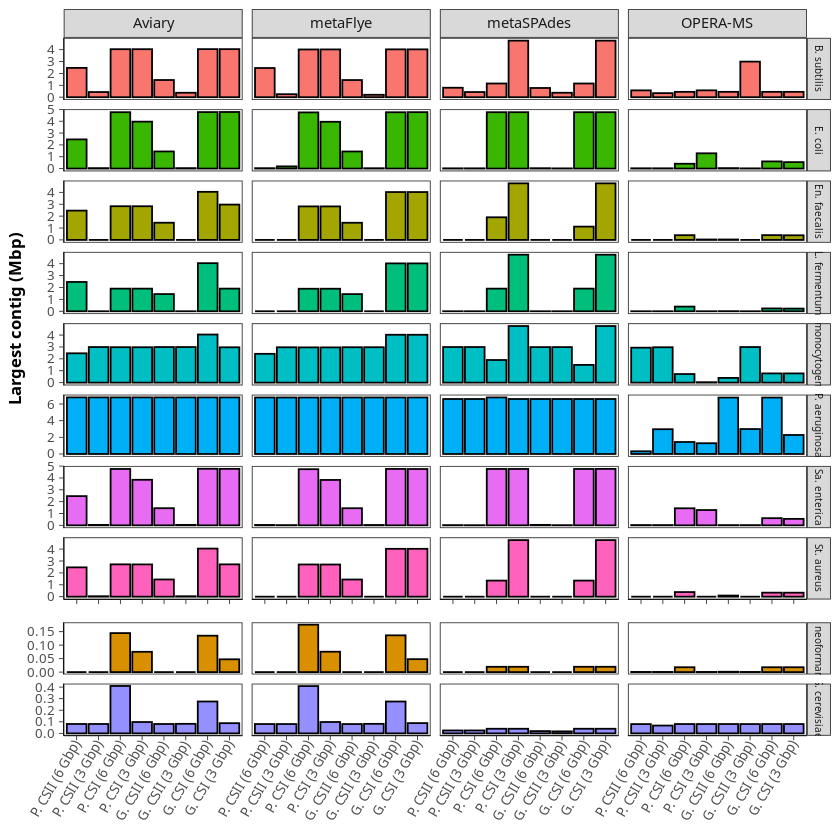

In [90]:
sizes <- c("0 MB", "2 MB",  "4 MB", "6 MB")
bac <- ggplot(data=all_stats$largest_contig[euk == FALSE, ], aes(x=sample, y=value / 1e6, fill=Assemblies)) +
    scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 7)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    labs(y="Largest contig (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    bac_theme +
    theme(
        axis.title.y=element_text(margin = margin(t = 0, r = 14, b = 0, l = 0))
    )

euk <- ggplot(data=all_stats$largest_contig[euk == TRUE & Assemblies != "Not Aligned", ], aes(x=sample, y=value / 1e6, fill=Assemblies)) +
    scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 7)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    scale_x_discrete(labels=sample_types) +
    labs(y="") +
    euk_theme
# bac
largest_contig <- ggarrange(bac, euk, nrow=2, ncol=1, heights=c(0.73, 0.27))
largest_contig
ggsave("zymo_largest_contig.png", dpi=600, width=12, height=6)

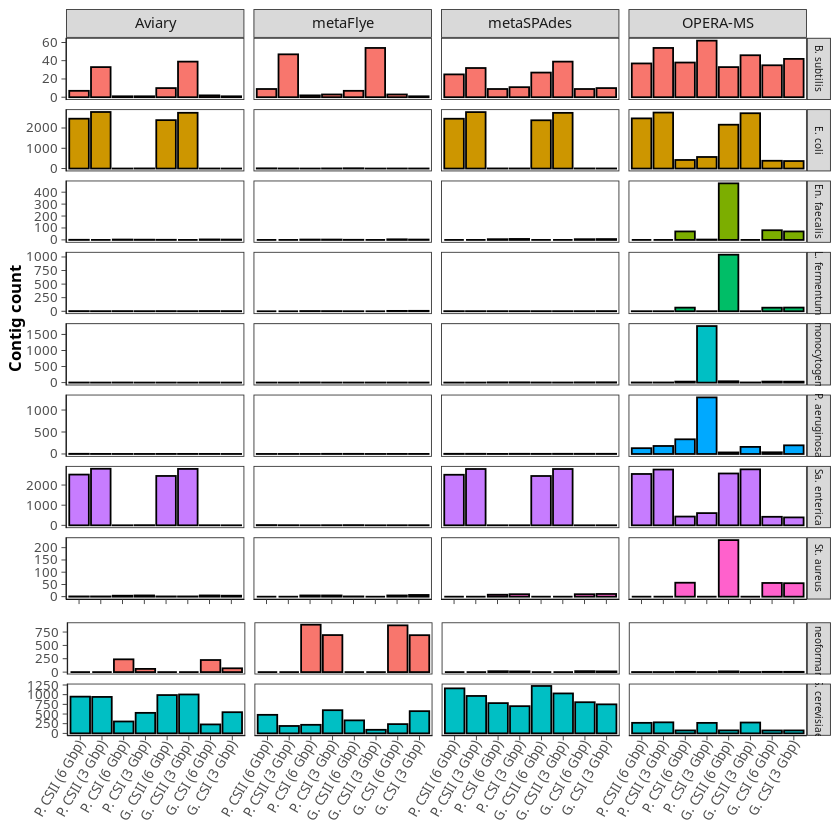

In [119]:
bac <- ggplot(data=all_stats$contig_count[euk == FALSE, ], aes(x=sample, y=value, fill=Assemblies)) +
#     scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 12000)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    labs(y="Contig count") +
    scale_x_discrete(labels=sample_types) +
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=10, face="bold"),
          axis.title.y=element_text(margin = margin(t = 0, r = 2, b = 0, l = 0)),
          axis.title.x=element_blank(),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          strip.text.y=element_text(size=6),
          axis.text.x=element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="none" ,
          legend.direction="horizontal", 
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

euk <- ggplot(data=all_stats$contig_count[euk == TRUE & Assemblies != "Not Aligned", ], aes(x=sample, y=value, fill=Assemblies)) +
#     scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
    labs(y="") +
#     expand_limits(y=c(0, 6.5e06)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    scale_x_discrete(labels=sample_types) +
    euk_theme

contig_count <- ggarrange(bac, euk, nrow=2, heights=c(0.73, 0.27))
ggsave("zymo_contig_count.png", dpi=600, width=6, height=9)
contig_count

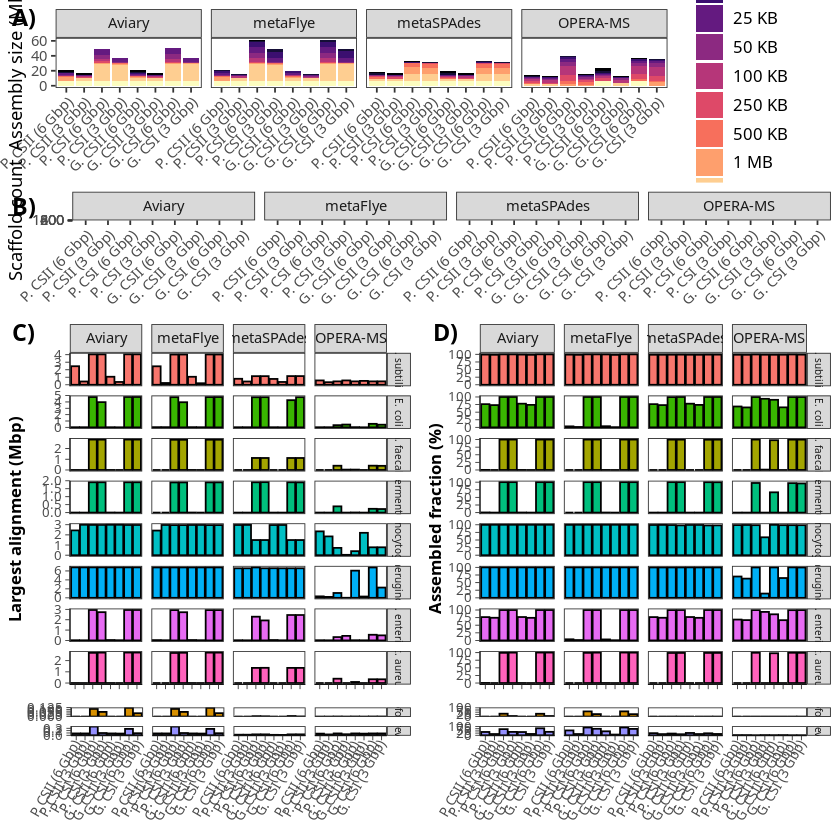

In [125]:
scaffold_dists <- ggarrange(assembly_sizes, scaffold_count, nrow=2, ncol=1, labels=c("A)", "B)"), heights=c(0.6, 0.4))
quast_results <- ggarrange(largest_alignment, assembled_fraction, nrow=1, ncol=2, labels=c("C)", "D)"), widths=c(1, 1))
# quast_results

ggarrange(scaffold_dists, quast_results, nrow=2, heights=c(0.75, 1.25))
ggsave("zymo_aggregate.png", dpi=600, width=12, height=15)

In [105]:
# all_stats

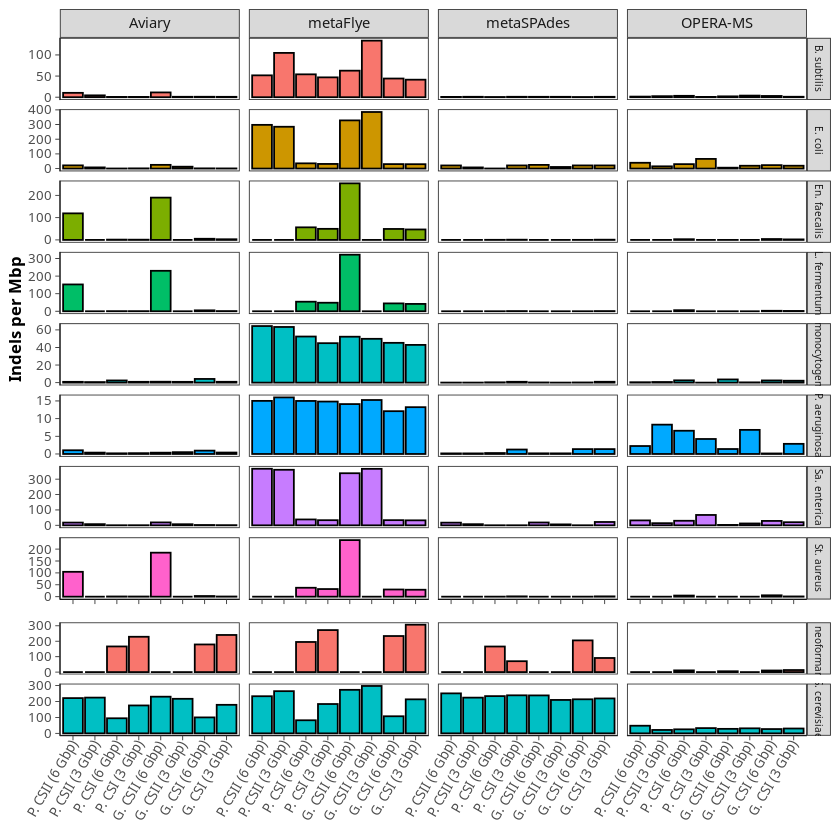

In [107]:
bac <- ggplot(data=all_stats$indels[euk == FALSE, ], aes(x=sample, y=value / 10, fill=Assemblies)) +
#     scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 100)) + 
    labs(y="Indels per Mbp") +
    scale_x_discrete(labels=sample_types) +
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    bac_theme

euk <- ggplot(data=all_stats$indels[euk == TRUE, ], aes(x=sample, y=value / 10, fill=Assemblies)) +
#     scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 100)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    scale_x_discrete(labels=sample_types) +
    labs(y="") +
    euk_theme

indels <- ggarrange(bac, euk, nrow = 2, heights=c(0.73, 0.27))
indels
ggsave("zymo_indels_per_mbp.png", dpi=600, width=6, height=9)

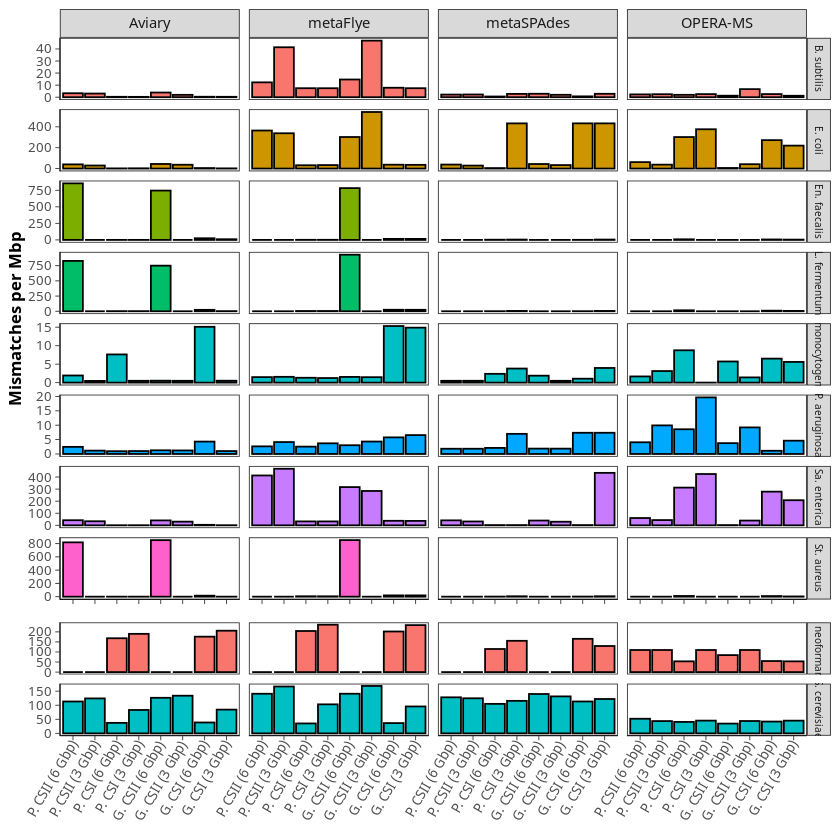

In [109]:
bac <- ggplot(data=all_stats$mismatches[euk == FALSE, ], aes(x=sample, y=value / 10, fill=Assemblies)) +
#     scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 100)) + 
    labs(y="Mismatches per Mbp") +
    scale_x_discrete(labels=sample_types) +
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    bac_theme

euk <- ggplot(data=all_stats$mismatches[euk == TRUE, ], aes(x=sample, y=value / 10, fill=Assemblies)) +
#     scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
#     expand_limits(y=c(0, 100)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    scale_x_discrete(labels=sample_types) +
    labs(y="") +
    euk_theme

mismatches <- ggarrange(bac, euk, nrow = 2, heights=c(0.73, 0.27))
mismatches
ggsave("zymo_mismatches_per_mbp.png", dpi=600, width=6, height=9)

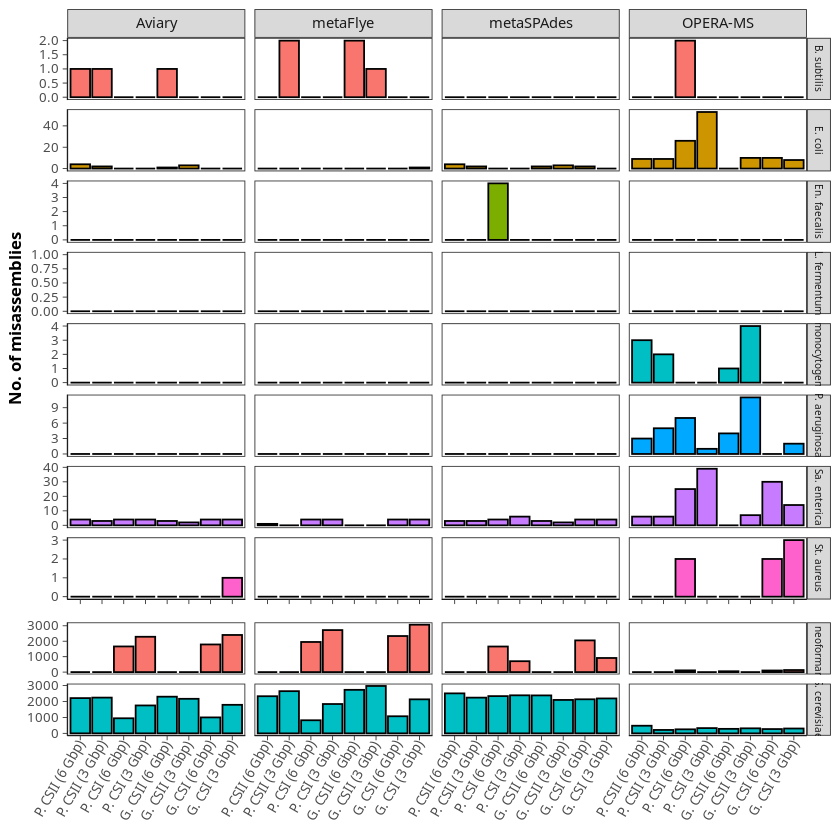

In [115]:
bac <- ggplot(data=all_stats$misassemblies[euk == FALSE, ], aes(x=sample, y=value, fill=Assemblies)) +
#     scale_fill_manual(values=values) +  
    geom_bar(stat="identity", color="black") +
    expand_limits(y=c(0, 1)) + 
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    labs(y="No. of misassemblies") +
    scale_x_discrete(labels=sample_types) +
    theme(axis.text=element_text(size=8),
      axis.title=element_text(size=10, face="bold"),
      axis.title.y=element_text(margin = margin(t = 0, r = 5, b = 0, l = 0)),
      axis.title.x=element_blank(),
      axis.line = element_line(size=0.25),
      axis.ticks=element_line(size=0.25),
      strip.text.y=element_text(size=6),
      axis.text.x=element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      legend.position="none" ,
      legend.direction="horizontal", 
      legend.text=element_text(size=10), 
      legend.background=element_blank(), 
      legend.key=element_blank())

euk <- ggplot(data=all_stats$indels[euk == TRUE, ], aes(x=sample, y=value, fill=Assemblies)) +
#     scale_fill_manual(values=values) + 
    geom_bar(stat="identity", color="black") +
    facet_grid(Assemblies ~ variable, labeller=labeller(variable=assemblers), scales="free_y") +
    scale_x_discrete(labels=sample_types) +
    labs(y="") + 
    euk_theme

misassemblies <- ggarrange(bac, euk, nrow=2, heights=c(0.73, 0.27))
misassemblies
ggsave("zymo_misassemblies.png", dpi=600, width=6, height=9)

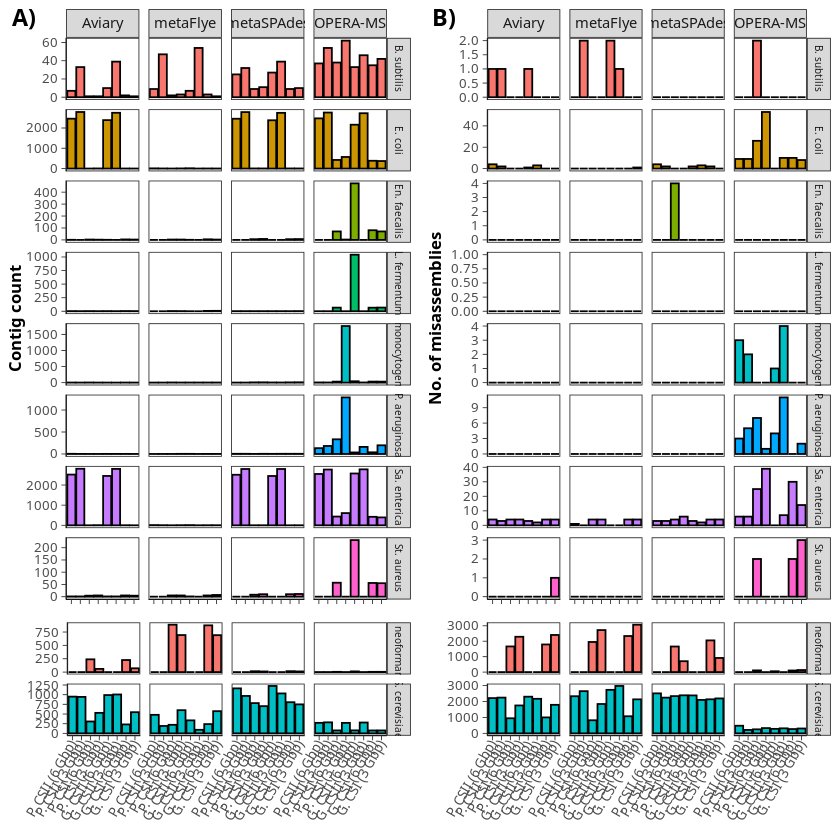

In [120]:
ggarrange(contig_count, misassemblies, ncol=2, labels=c("A)", "B)"))
ggsave("zymo_contig_count_and_misassemblies.png", dpi=600, width=12, height=9)

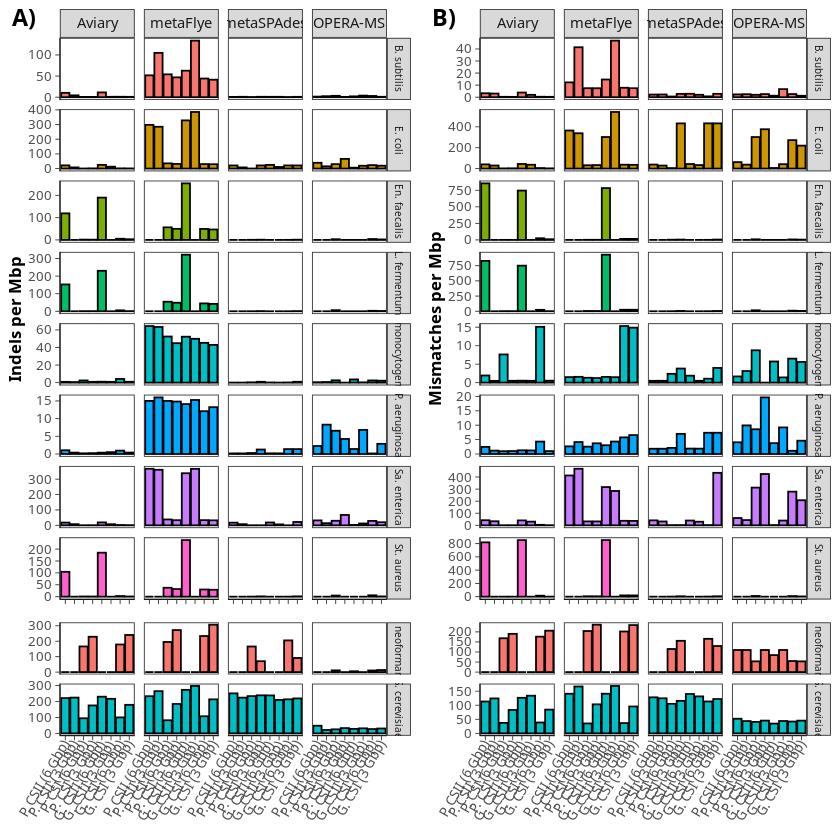

In [121]:
ggarrange(indels, mismatches, ncol=2, labels=c("A)", "B)"))
ggsave("zymo_indels_and_mismatches.png", dpi=600, width=12, height=9)

# CAMI Two

In [185]:
cami_theme <- theme(
          axis.text=element_text(size=8),
          axis.title=element_text(size=10, face="bold"),
          axis.title.x=element_blank(),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          axis.text.x=element_text(size=8, angle=60, vjust=1.1, hjust=1.15),
          axis.text.y=element_text(margin=margin(t=0, b=0, l=17, r=0)),
          strip.text.y=element_text(size=6),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="none",
#           legend.direction="vertical", 
          legend.title=element_blank(),
#           legend.text=element_text(size=10), 
#           legend.background=element_blank(), 
#           legend.key=element_blank(),
          plot.margin = margin(r=7, l=6, t=2, b=2)
)

In [148]:
cami_gi_stats$largest_alignment

NULL

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


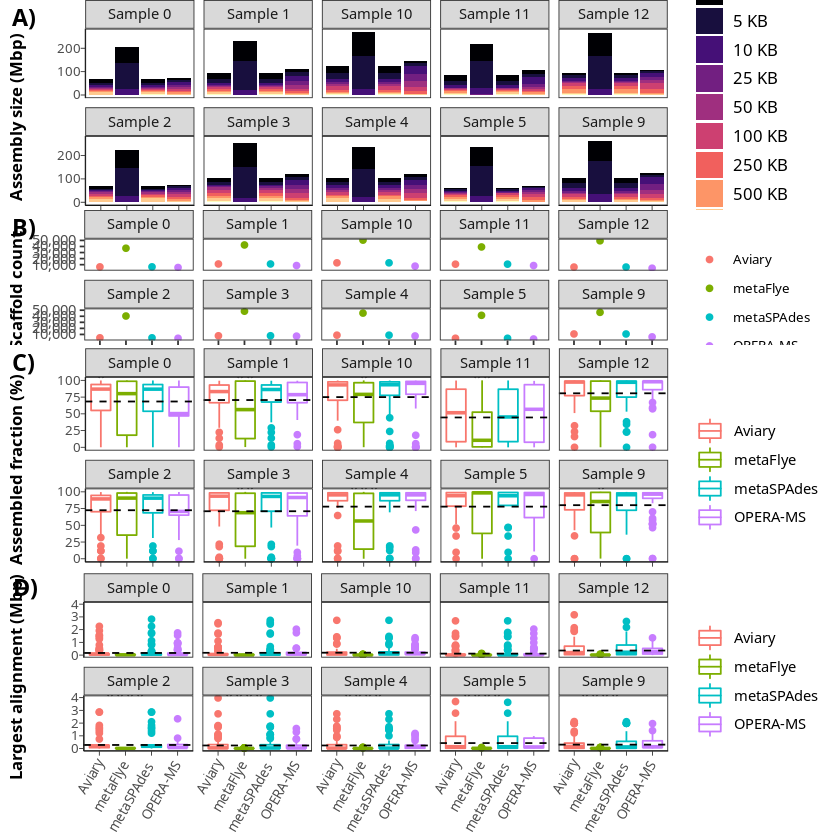

In [227]:
cami_gi_stats <- get_cami_stats("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_gi/binning/assemblies/results/")
values = gg_color_hue(length(genomes))
names(values) = genomes
options(scipen=2)

fraction_mean <- cami_gi_stats$fraction_recovered %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value))

size_mean <- cami_gi_stats$largest_alignment %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value / 1e6))
# print(size_mean)
# cami_gi_stats$fraction_recovered$value
gi_fraction_recovered <- cami_gi_stats$fraction_recovered %>% ggplot(aes(x=variable, y=`value`, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
    expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Assembled fraction (%)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme + 
    theme(
        axis.text.x=element_blank()
    )  +     
    geom_hline(data = fraction_mean, aes(yintercept=mean_val), linetype = 2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=95) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

# gi_fraction_recovered
gi_largest_contig <- ggplot(data=cami_gi_stats$largest_alignment, aes(x=variable, y=value / 1e6, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
#     expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Largest alignment (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme +
    theme(
        axis.text.y=element_text(margin=margin(t=0, b=0, l=25, r=0))
    )  +     
    geom_hline(data = size_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=max(cami_gi_stats$largest_alignment$value/1e6) - 0.3) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 
# gi_largest_contig
cami_gi_sizes <- concatenate_all_results('/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_gi/binning/stats/')
cami_gi_sizes[, sample_name:=gsub("sample_", "Sample ", sample_name)]
gi_dist <- ggplot(cami_gi_sizes[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size / 1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
#     scale_y_continuous(labels = function(x) scales::scientific(x, digits = 2)) + 
    scale_y_continuous(labels = comma) +
    cami_theme +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_blank(),
          axis.title.x=element_blank(),
          plot.margin = margin(l=6, r=26)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

gi_scaffold_count <- ggplot(cami_gi_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=number_of_scaffolds)) +
    scale_color_hue(labels=sample_types) +
    scale_x_discrete(labels=sample_types) +
    geom_point() +
#     scale_y_continuous(labels = function(x) scales::scientific(x, digits = 1)) +
    scale_y_continuous(labels = comma) +
    labs(y="Scaffold count", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title=element_text(size=10, face="bold"),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_blank(),
          plot.margin = margin(l=6, r=13)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

gi_stats <- ggarrange(gi_scaffold_count, gi_fraction_recovered, gi_largest_contig, nrow=3, heights = c(0.3, 0.5, 0.6), legend="right", labels=c("B)", "C)", "D)"))
# gi_stats
# gi_dists <- ggarrange(gi_dist, gi_scaffold_count, nrow=2)
ggarrange(gi_dist, gi_stats, heights=c(0.25, 0.75), nrow=2, labels=c("A)"))
# ggsave("cami_two_gi_assembly_stats.png", height=13, width=10, dpi=600, type = "cairo-png")

In [236]:
# cami_gi_sizes
cami_gi_sizes[, mean:=mean(max_scaffold_size), by=c("assembler", "sample_name")]
cami_gi_means <- cami_gi_sizes[, unique(mean), by=c("assembler", "sample_name")]
cami_gi_means[, mean:=mean(V1), by=c("assembler")]
cami_gi_means[, unique(mean), by=c("assembler")]

assembler,V1
<chr>,<dbl>
OPERA-MS,1449626.9
metaSPAdes,2535800.0
metaFlye,71241.6
Aviary,2187800.0


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_operams.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_aviary.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_metaspades_scaffolds.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats

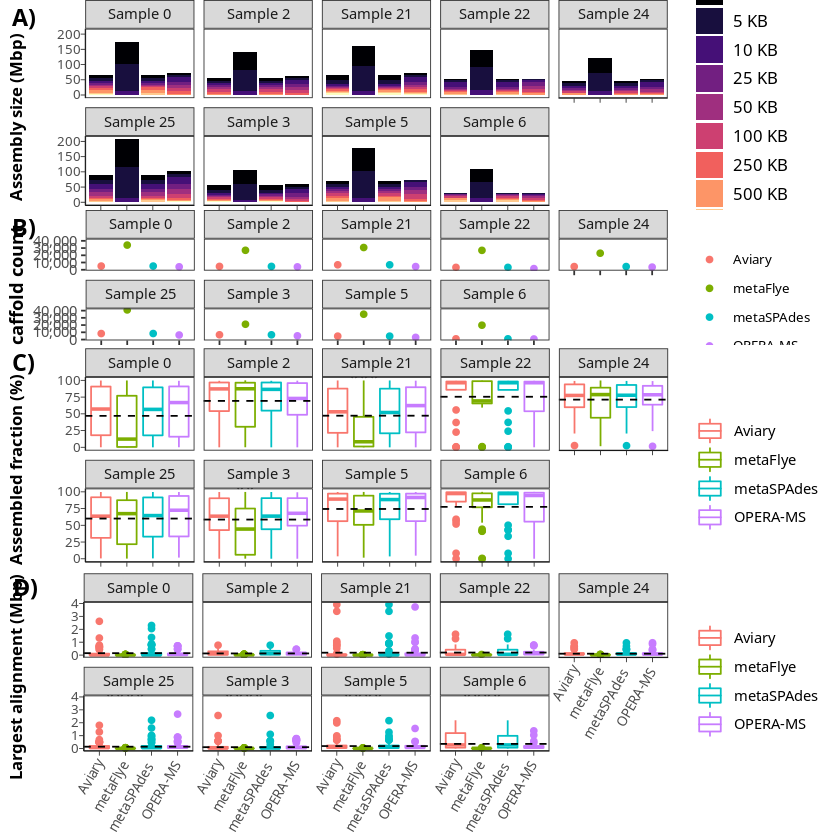

In [201]:
cami_uro_stats <- get_cami_stats("/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_uro/binning/assemblies/results/")
values = gg_color_hue(length(genomes))
names(values) = genomes
options(scipen=2)

fraction_mean <- cami_uro_stats$fraction_recovered %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value))

size_mean <- cami_uro_stats$largest_alignment %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value / 1e6))

uro_fraction_recovered <- ggplot(data=cami_uro_stats$fraction_recovered, aes(x=variable, y=value, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
    expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Assembled fraction (%)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme + theme(axis.text.x=element_blank())  +     
    geom_hline(data = fraction_mean, aes(yintercept=mean_val), linetype = 2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=95) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

uro_largest_contig <- ggplot(data=cami_uro_stats$largest_alignment, aes(x=variable, y=value / 1e6, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
#     expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Largest alignment (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme  + 
    theme(
        axis.text.y=element_text(margin=margin(t=0, b=0, l=25, r=0))
    )  + 
    geom_hline(data = size_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=max(cami_uro_stats$largest_alignment$value/1e6) - 0.3) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

cami_uro_sizes <- concatenate_all_results('/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_uro/binning/stats/')
cami_uro_sizes[, sample_name:=gsub("sample_", "Sample ", sample_name)]
uro_dist <- ggplot(cami_uro_sizes[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size /1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
#     scale_y_continuous(labels = function(x) scales::scientific(x, digits = 2)) +
    scale_y_continuous(labels = comma) +
    cami_theme + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_blank(),
          axis.title.x=element_blank(),
          plot.margin = margin(l=6, r=26)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

uro_scaffold_count <- ggplot(cami_uro_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=number_of_scaffolds)) +
    scale_color_hue(labels=sample_types) +
    scale_x_discrete(labels=sample_types) +
    geom_point() +
#     scale_y_continuous(labels = function(x) scales::scientific(x, digits = 2)) +
    scale_y_continuous(labels = comma) +
    labs(y="Scaffold count", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title=element_text(face="bold"),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_blank(),
          plot.margin = margin(l=6, r=13)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

uro_stats <- ggarrange(uro_scaffold_count, uro_fraction_recovered, uro_largest_contig, nrow=3, heights = c(0.3, 0.5, 0.6), legend="right", labels=c("B)", "C)", "D)"))
# uro_stats
# uro_dists <- ggarrange(uro_dist, uro_scaffold_count, nrow=2)
ggarrange(uro_dist, uro_stats, heights=c(0.25, 0.75), nrow=2, labels=c("A)"))
ggsave("cami_two_uro_assembly_stats.png", height=13, width=10, dpi=600, type = "cairo-png")

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_operams.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NA

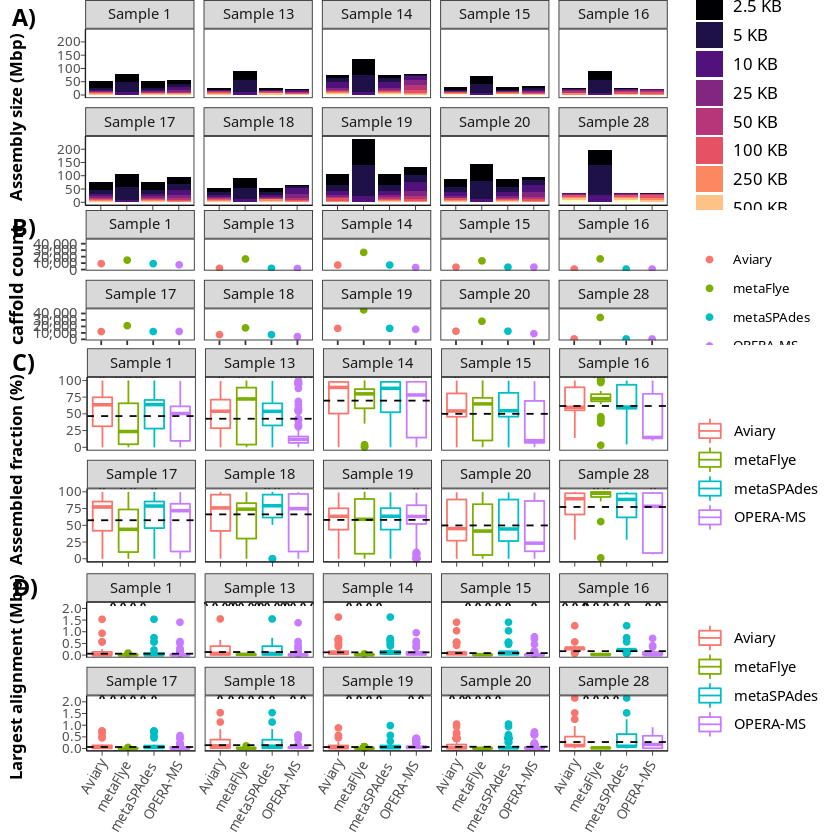

In [219]:
cami_skin_stats <- get_cami_stats("/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Skin/binning/assemblies/results/")
values = gg_color_hue(length(genomes))
names(values) = genomes
options(scipen=2)

fraction_mean <- cami_skin_stats$fraction_recovered %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value))

size_mean <- cami_skin_stats$largest_alignment %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value / 1e6))

skin_fraction_recovered <- ggplot(data=cami_skin_stats$fraction_recovered, aes(x=variable, y=value, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
    expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Assembled fraction (%)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme + 
    theme(axis.text.x=element_blank(), axis.text.y=element_text(margin=margin(t=0, b=0, l=18, r=0)))  +     
    geom_hline(data = fraction_mean, aes(yintercept=mean_val), linetype = 2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=95) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 


skin_largest_contig <- ggplot(data=cami_skin_stats$largest_alignment, aes(x=variable, y=value / 1e6, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
#     expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Largest alignment (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme +
    theme(
        axis.text.y=element_text(margin=margin(t=0, b=0, l=20, r=0))
    )  +    
    geom_hline(data = size_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=max(cami_skin_stats$largest_contig$value/1e6) - 0.3) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

cami_skin_sizes <- concatenate_all_results('/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Skin/binning/stats/')
cami_skin_sizes[, sample_name:=gsub("sample_", "Sample ", sample_name)]
skin_dist <- ggplot(cami_skin_sizes[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size / 1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    scale_y_continuous(labels = comma) +
    cami_theme + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_blank(),
          axis.title.x=element_blank(),
          plot.margin = margin(l=6, r=26)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

skin_scaffold_count <- ggplot(cami_skin_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=number_of_scaffolds)) +
    scale_color_hue(labels=sample_types) +
    scale_x_discrete(labels=sample_types) +
    geom_point() +
    scale_y_continuous(labels = comma) +
    labs(y="Scaffold count", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title=element_text(face="bold"),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_blank(),
          plot.margin = margin(l=6, r=13)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

skin_stats <- ggarrange(skin_scaffold_count, skin_fraction_recovered, skin_largest_contig, nrow=3, heights = c(0.3, 0.5, 0.6), legend="right", labels=c("B)", "C)", "D)"))
# skin_stats
# skin_dists <- ggarrange(skin_dist, skin_scaffold_count, nrow=2)
ggarrange(skin_dist, skin_stats, heights=c(0.25, 0.75), nrow=2, labels=c("A)"))
ggsave("cami_two_skin_assembly_stats.png", height=13, width=10, dpi=600, type = "cairo-png")

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_metaspades_scaffolds.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_operams.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_f

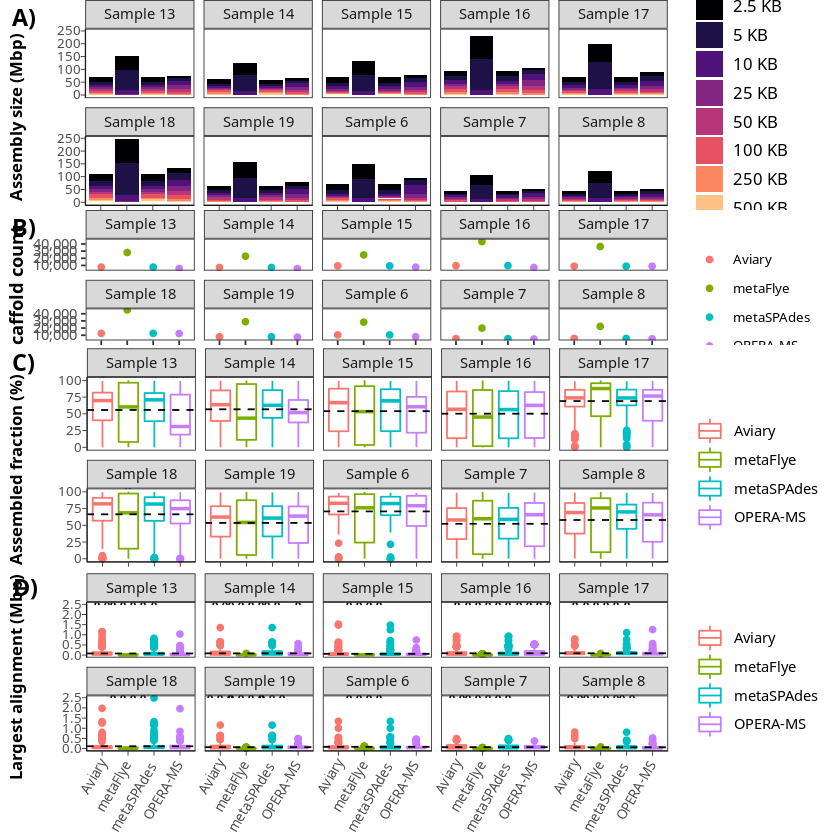

In [216]:
cami_oral_stats <- get_cami_stats("/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Oral/binning/assemblies/results/")
values = gg_color_hue(length(genomes))
names(values) = genomes
options(scipen=2)

fraction_mean <- cami_oral_stats$fraction_recovered %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value))

size_mean <- cami_oral_stats$largest_alignment %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value / 1e6))

oral_fraction_recovered <- ggplot(data=cami_oral_stats$fraction_recovered, aes(x=variable, y=value, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
    expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Assembled fraction (%)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme + theme(axis.text.x=element_blank(), axis.text.y=element_text(margin=margin(t=0, b=0, l=18, r=0)))  +      
    geom_hline(data = fraction_mean, aes(yintercept=mean_val), linetype = 2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=95) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 


oral_largest_contig <- ggplot(data=cami_oral_stats$largest_alignment, aes(x=variable, y=value / 1e6, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
#     expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Largest alignment (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme +
    theme(
        axis.text.y=element_text(margin=margin(t=0, b=0, l=20, r=0))
    )  +     
    geom_hline(data = size_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=max(cami_oral_stats$largest_alignment$value/1e6) - 0.3) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

cami_oral_sizes <- concatenate_all_results('/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Oral/binning/stats/')
cami_oral_sizes[, sample_name:=gsub("sample_", "Sample ", sample_name)]
oral_dist <- ggplot(cami_oral_sizes[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size / 1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    scale_y_continuous(labels = comma) +
    cami_theme + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_blank(),
          axis.title.x=element_blank(),
          plot.margin = margin(l=6, r=26)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

oral_scaffold_count <- ggplot(cami_oral_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=number_of_scaffolds)) +
    scale_color_hue(labels=sample_types) +
    scale_x_discrete(labels=sample_types) +
    geom_point() +
    scale_y_continuous(labels = comma) +
    labs(y="Scaffold count", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title=element_text(face="bold"),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_blank(),
          plot.margin = margin(l=6, r=13)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

oral_stats <- ggarrange(oral_scaffold_count, oral_fraction_recovered, oral_largest_contig, nrow=3, heights = c(0.3, 0.5, 0.6), legend="right", labels=c("B)", "C)", "D)"))
# oral_stats
# oral_dists <- ggarrange(oral_dist, oral_scaffold_count, nrow=2)
ggarrange(oral_dist, oral_stats, heights=c(0.25, 0.75), nrow=2, labels=c("A)"))
ggsave("cami_two_oral_assembly_stats.png", height=13, width=10, dpi=600, type = "cairo-png")

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_aviary.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_metaspades_scaffolds.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_flye.txt"), :
“NAs introduced by coercion”
Warning message in retrieve_single_stats(paste0(directory, sample_name, "/stats_op

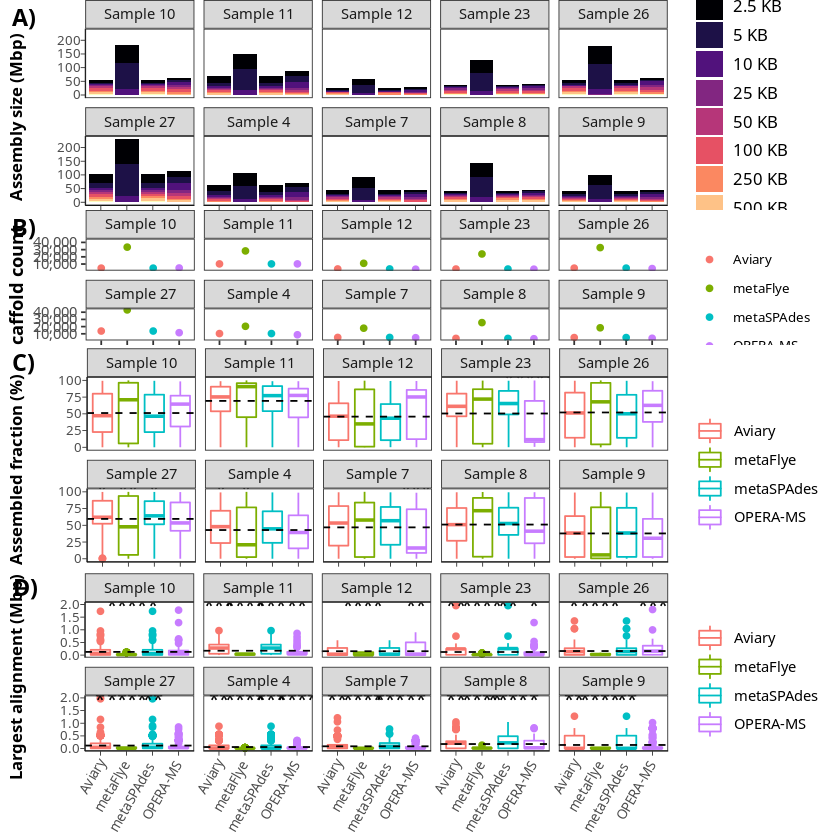

In [218]:
cami_air_stats <- get_cami_stats("/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Airways/binning/assemblies/results/")
values = gg_color_hue(length(genomes))
names(values) = genomes

fraction_mean <- cami_air_stats$fraction_recovered %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value))

size_mean <- cami_air_stats$largest_alignment %>%
    group_by(sample) %>%
    summarize(mean_val = mean(value / 1e6))

air_fraction_recovered <- ggplot(data=cami_air_stats$fraction_recovered, aes(x=variable, y=value, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
    expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Assembled fraction (%)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme + theme(axis.text.x=element_blank(), axis.text.y=element_text(margin=margin(t=0, b=0, l=18, r=0)))  +    
    geom_hline(data = fraction_mean, aes(yintercept=mean_val), linetype = 2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=95) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

air_largest_contig <- ggplot(data=cami_air_stats$largest_alignment, aes(x=variable, y=value / 1e6, color=variable)) +
#     scale_fill_manual(values=values) +  
    geom_boxplot() +
#     expand_limits(y=c(0, 100)) + 
    facet_wrap(~ sample, nrow=2) +
    labs(y="Largest alignment (Mbp)") +
    scale_x_discrete(labels=sample_types) +
    cami_theme +
    theme(
#         axis.text.x=element_blank(), 
        axis.text.y=element_text(margin=margin(t=0, b=0, l=19, r=0))
    ) +     
    geom_hline(data = size_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=TRUE,
                     ref.group = ".all.", hide.ns=TRUE, label.y=max(cami_air_stats$largest_alignment$value/1e6) - 0.3) + # Pairwise comparison against all
    guides(
      color = guide_legend(
        title = "Legend Title",
        override.aes = aes(label = "")
      )
    ) 

cami_air_sizes <- concatenate_all_results('/scratch/microbiome/n10853499/00-rosella_testing/01-CAMI_II/CAMI_Airways/binning/stats/')
cami_air_sizes[, sample_name:=gsub("sample_", "Sample ", sample_name)]
air_dist <- ggplot(cami_air_sizes[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size / 1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold Length", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    scale_y_continuous(labels = comma) +
    cami_theme + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
          axis.text.x=element_blank(),
          axis.title.x=element_blank(),
          plot.margin = margin(l=6, r=26)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

air_scaffold_count <- ggplot(cami_air_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=number_of_scaffolds)) +
    scale_color_hue(labels=sample_types) +
    scale_x_discrete(labels=sample_types) +
    geom_point() +
    scale_y_continuous(labels = comma) +
    labs(y="Scaffold count", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title=element_text(face="bold"),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_blank(),
          plot.margin = margin(l=6, r=13)
        ) +
    facet_wrap(~sample_name, nrow=2, ncol=5)

air_stats <- ggarrange(air_scaffold_count, air_fraction_recovered, air_largest_contig, nrow=3, heights = c(0.3, 0.5, 0.6), legend="right", labels=c("B)", "C)", "D)"))
# air_stats
# air_dists <- ggarrange(air_dist, air_scaffold_count, nrow=2)
ggarrange(air_dist, air_stats, heights=c(0.25, 0.75), nrow=2, labels=c("A)"))
ggsave("cami_two_air_assembly_stats.png", height=13, width=10, dpi=600, type = "cairo-png")

In [964]:
cami_air_sizes

min_scaffold_length,number_of_scaffolds,number_of_contigs,total_scaffold_length,total_contig_length,scaffold_contig_coverage,assembler,assembly_size,N50,max_contig_size,assembly_size_short,max_scaffold_size,gained_size,sample_name
1 MB,1,1,1781144,1781134,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,1781144,Sample 10
500 KB,5,5,4163699,4163686,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,2382555,Sample 10
250 KB,24,24,10879427,10879394,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,6715728,Sample 10
100 KB,89,89,20675362,20675265,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,9795935,Sample 10
50 KB,208,208,28835825,28835637,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,8160463,Sample 10
25 KB,441,441,37098909,37098579,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,8263084,Sample 10
10 KB,1072,1072,46689099,46688566,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,9590190,Sample 10
5 KB,2330,2331,55397586,55396917,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,8708487,Sample 10
2.5 KB,4483,4484,62933317,62932554,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,7535731,Sample 10
1 KB,123803,123804,115359426,115358633,100.00%,OPERA-MS,115358633,4.072 KB,1.781 MB,115.359 MB,1781000,52426109,Sample 10


Warning message in `[.data.table`(sludge_sizes, , `:=`(proportion, (gained_size/assembly_size) * :
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”


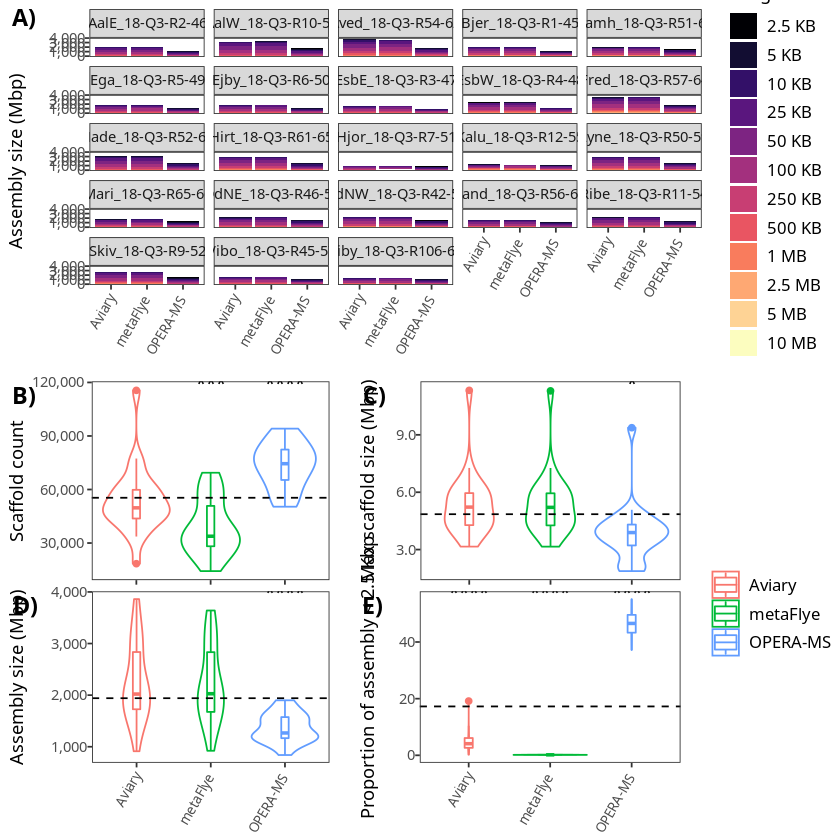

In [19]:
sludge_sizes <- concatenate_all_results('/scratch/microbiome/n10853499/03-aviary_testing/01-activated_sludge/assembly/stats/', with_spades=FALSE)
sludge_sizes[, proportion:=(gained_size/assembly_size) * 100]
# sludge_sizes[assembler=="Aviary" & sample_name=="AalW_18-Q3-R10-53", max_scaffold_size:=4300000]
# sludge_sizes[assembler=="metaFlye" & sample_name=="Aved_18-Q3-R54-62", max_scaffold_size:=5450000]
# print(sludge_sizes)
sludge_sizes[, max_scaffold_size:=ifelse(max_scaffold_size < 1e6, ifelse(max_scaffold_size < 1e5, max_scaffold_size * 100, max_scaffold_size * 10), max_scaffold_size)]

sludge_sizes[, sample_name:=gsub("sample_", "Sample ", sample_name)]
sludge_dist <- ggplot(sludge_sizes[min_scaffold_length!="1 KB"], aes(fill=min_scaffold_length, y=gained_size/1e6, x=assembler)) + 
    geom_bar(position="stack", stat="identity") + 
    labs(fill="Scaffold\nLength", x = "Assembler", y = "Assembly size (Mbp)") +
    scale_fill_viridis(discrete=TRUE, option="magma") + 
    scale_y_continuous(labels = comma) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=10),
#           axis.text.x=element_text(size=8, angle=60, vjust=1.1, hjust=1.15),
          axis.text.x=element_text(size=8, angle=60, vjust=1.1, hjust=1.15),
          axis.title.x=element_blank(),
          axis.text.y=element_text(margin=margin(t=0, b=0, l=10, r=0))
        ) +
    facet_wrap(~sample_name)


size_mean <- sludge_sizes[min_scaffold_length=="2.5 KB"] %>%
#     group_by(sample) %>%
    summarize(mean_val = mean(number_of_scaffolds))

sludge_scaffold_count <- ggplot(sludge_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=number_of_scaffolds)) +
#     scale_color_hue(labels=sample_types) +
#     scale_x_discrete(labels=sample_types) +
    geom_violin(show.legend = T) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(labels = comma) +
    labs(y="Scaffold count", x="", color="") +
    geom_hline(data = size_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=F,
                     ref.group = ".all.", hide.ns=TRUE) + # Pairwise comparison against all+0
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.title=element_blank(),
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank(),
          axis.text.x=element_blank(),
          plot.margin = margin(r=13, l=6, t=2, b=2)
        )


max_mean <- sludge_sizes[min_scaffold_length=="1 KB"] %>%
#     group_by(sample) %>%
    summarize(mean_val = mean(max_scaffold_size/1e6))

sludge_scaffold_max <- ggplot(sludge_sizes[min_scaffold_length=="1 KB"], aes(color=assembler, x=assembler, y=max_scaffold_size/1e6)) +
#     scale_color_hue(labels=sample_types) +
#     scale_x_discrete(labels=sample_types) +
    geom_violin(show.legend = T) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(labels = comma) +
    geom_hline(data = max_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=F,
                     ref.group = ".all.", hide.ns=TRUE) + # Pairwise comparison against all+0
    labs(y="Max scaffold size (Mbp)", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.text.x=element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.y=element_text(margin=margin(t=0, b=0, l=8, r=0)),
          plot.margin = margin(r=13, l=6, t=2, b=2)
        )



assembly_mean <- sludge_sizes[min_scaffold_length=="2.5 KB"] %>%
#     group_by(sample) %>%
    summarize(mean_val = mean(total_scaffold_length /1e6))

sludge_assembly_size <- ggplot(sludge_sizes[min_scaffold_length=="2.5 KB"], aes(color=assembler, x=assembler, y=total_scaffold_length/1e6)) +
#     scale_color_hue(labels=sample_types) +
#     scale_x_discrete(labels=sample_types) +
    geom_violin(show.legend = T) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(labels = comma) +
    geom_hline(data = assembly_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=F,
                     ref.group = ".all.", hide.ns=TRUE) + # Pairwise comparison against all+0
    labs(y="Assembly size (Mbp)", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_text(size=8, angle=60, vjust=1.1, hjust=1.15),
          axis.text.y=element_text(margin=margin(t=0, b=0, l=12, r=0)),
          plot.margin = margin(r=13, l=6, t=2, b=2)
        )

proportion_mean <- sludge_sizes[min_scaffold_length=="1 KB"] %>%
#     group_by(sample) %>%
    summarize(mean_val = mean(proportion))
sludge_assembly_proportion <- ggplot(sludge_sizes[min_scaffold_length=="1 KB"], aes(color=assembler, x=assembler, y=proportion)) +
#     scale_color_hue(labels=sample_types) +
#     scale_x_discrete(labels=sample_types) +
    geom_violin(show.legend = T) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(labels = comma) +
    geom_hline(data = proportion_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=F,
                     ref.group = ".all.", hide.ns=TRUE) + # Pairwise comparison against all+0
    labs(y="Proportion of assembly < 2.5 Kbp", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_text(size=8, angle=60, vjust=1.1, hjust=1.15),
          axis.text.y=element_text(margin=margin(t=0, b=0, l=10, r=0)),
          plot.margin = margin(r=13, l=6, t=2, b=2)
        )

scaffolds <- ggarrange(sludge_scaffold_count, sludge_scaffold_max, sludge_assembly_size, sludge_assembly_proportion, nrow=2, ncol=2, common.legend=T, legend="right", heights=c(0.5, 0.6), labels=c("B)", "C)", "D)", "E)"))
ggarrange(sludge_dist, scaffolds, nrow=2, heights=c(0.45, 0.55), labels=c("A)"))

ggsave("activated_sludge_assembly.png", width=9, height=12, dpi=600, type="cairo-png")

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


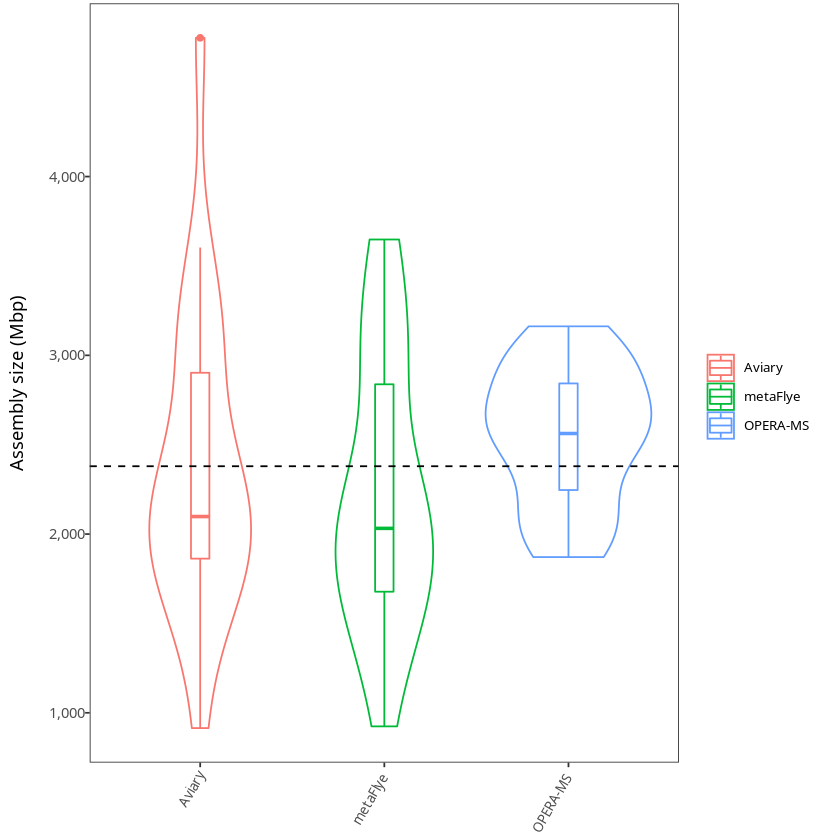

In [6]:
assembly_mean <- sludge_sizes[min_scaffold_length=="1 KB"] %>%
#     group_by(sample) %>%
    summarize(mean_val = mean(assembly_size /1e6))

sludge_assembly_size <- ggplot(sludge_sizes[min_scaffold_length=="1 KB"], aes(color=assembler, x=assembler, y=assembly_size/1e6)) +
#     scale_color_hue(labels=sample_types) +
#     scale_x_discrete(labels=sample_types) +
    geom_violin(show.legend = T) +
    geom_boxplot(width=0.1) +
    scale_y_continuous(labels = comma) +
    geom_hline(data = assembly_mean, aes(yintercept=mean_val), linetype=2)+ # Add horizontal line at base mean
    stat_compare_means(label = "p.signif", method = "t.test", show.legend=F,
                     ref.group = ".all.", hide.ns=TRUE) + # Pairwise comparison against all+0
    labs(y="Assembly size (Mbp)", x="", color="") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          legend.position="right",
          legend.direction="vertical", 
          legend.text=element_text(size=8),
          axis.text.x=element_text(size=8, angle=60, vjust=1.1, hjust=1.15),
          axis.text.y=element_text(margin=margin(t=0, b=0, l=10, r=0)),
          plot.margin = margin(r=13, l=6, t=2, b=2)
        )
sludge_assembly_size

In [21]:
# scaffolds <- ggarrange(sludge_scaffold_count, sludge_scaffold_max, sludge_assembly_size, sludge_assembly_proportion, nrow=2, ncol=2, common.legend=T, legend="right", heights=c(0.5, 0.6), labels=c("B)", "C)", "D)", "E)"))
# scaffolds
mean(sludge_sizes[min_scaffold_length == "1 KB" & assembler == "OPERA-MS",]$proportion)

[1] 46.72166